# LOFAR conversion guide

In [1]:
from importlib.metadata import version
import os

try:
    import xradio

    print("XRADIO version", version("xradio"), "already installed.")
except ImportError as e:
    print(e)
    print("Installing XRADIO")

    os.system("pip install xradio")

    import xradio

    print("xradio version", version("xradio"), " installed.")

XRADIO version 1.1.12a0 already installed.


## Download dataset

In [2]:
import toolviper

toolviper.utils.data.download(file="small_lofar.ms")

[2026-01-21 13:12:12,304]     INFO    viperlog:  Downloading from [cloudflare] .... 


 Download List   
 ──────────────── 
  small_lofar.ms

[2026-01-21 13:12:12,306]     INFO    viperlog:  File exists: small_lofar.ms 


Output()

## Convert to Processing Set

In [3]:
from xradio.measurement_set import convert_msv2_to_processing_set

ms_file = "small_lofar.ms"
main_chunksize = {"frequency": 1, "time": 20}  # baseline, polarization
outfile = "small_lofar.ps.zarr"
convert_msv2_to_processing_set(
    in_file=ms_file,
    out_file=outfile,
    parallel_mode="none",
    persistence_mode='w',
    main_chunksize=main_chunksize,
)

[2026-01-21 13:12:13,296]     INFO    viperlog:  Updated partition scheme used: ['DATA_DESC_ID', 'OBS_MODE', 'OBSERVATION_ID'] 
[2026-01-21 13:12:13,297]     INFO    viperlog:  Number of partitions: 1 
[2026-01-21 13:12:13,297]     INFO    viperlog:  OBSERVATION_ID [0], DDI [0], STATE [0], FIELD [0], SCAN [0], EPHEMERIS [None] 
[2026-01-21 13:12:13,401]  WARNING    viperlog:  Source_id is -1. No source information will be included in the field_and_source_xds. 


## Processing Set

In [4]:
from xradio.measurement_set import open_processing_set

ps_xdt = open_processing_set(ps_store=outfile)
ps_xdt.xr_ps.summary()

,name,scan_intents,shape,execution_block_UID,polarization,scan_name,spw_name,spw_intents,field_name,source_name,line_name,field_coords,session_reference_UID,scheduling_block_UID,project_UID,start_frequency,end_frequency
0,small_lofar_0,[],"(5, 2775, 15, 4)",---,"[XX, XY, YX, YY]",[0],SB-349_0,[UNSPECIFIED],[BEAM_4_0],[Unknown],[],"[fk5, 14h00m00.00s, 86d00m00.00s]",---,---,LC9_007,1.270615e+08,1.272324e+08


In [5]:
ms_xdt = ps_xdt["small_lofar_0"]
ms_xdt

<xarray.DataTree 'small_lofar_0'>
Group: /small_lofar_0
│   Dimensions:                     (time: 5, baseline_id: 2775, frequency: 15,
│                                    polarization: 4, uvw_label: 3)
│   Coordinates:
│     * time                        (time) float64 40B 1.52e+09 ... 1.52e+09
│     * baseline_id                 (baseline_id) int64 22kB 0 1 2 ... 2773 2774
│     * frequency                   (frequency) float64 120B 1.271e+08 ... 1.272e+08
│     * polarization                (polarization) <U2 32B 'XX' 'XY' 'YX' 'YY'
│     * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
│       baseline_antenna1_name      (baseline_id) <U9 100kB dask.array<chunksize=(2775,), meta=np.ndarray>
│       baseline_antenna2_name      (baseline_id) <U9 100kB dask.array<chunksize=(2775,), meta=np.ndarray>
│       field_name                  (time) <U28 560B dask.array<chunksize=(5,), meta=np.ndarray>
│       scan_name                   (time) <U21 420B dask.array<chunksize=(5,), meta=np.ndarray>
│   Data variables:
│       EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 111kB dask.array<chunksize=(5, 2775), meta=np.ndarray>
│       FLAG                        (time, baseline_id, frequency, polarization) bool 832kB dask.array<chunksize=(5, 2775, 1, 4), meta=np.ndarray>
│       TIME_CENTROID               (time, baseline_id) float64 111kB dask.array<chunksize=(5, 2775), meta=np.ndarray>
│       UVW                         (time, baseline_id, uvw_label) float64 333kB dask.array<chunksize=(5, 2775, 3), meta=np.ndarray>
│       VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 7MB dask.array<chunksize=(5, 2775, 1, 4), meta=np.ndarray>
│       WEIGHT                      (time, baseline_id, frequency, polarization) float32 3MB dask.array<chunksize=(5, 2775, 1, 4), meta=np.ndarray>
│   Attributes:
│       creation_date:     2026-01-21T18:12:13.314534+00:00
│       creator:           {'software_name': 'xradio', 'version': '1.1.12a0'}
│       data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'date': '20...
│       observation_info:  {'observer': ['unknown'], 'observing_log': '[]', 'proj...
│       processor_info:    {'sub_type': 'LOFAR-COBALT', 'type': 'CORRELATOR'}
│       schema_version:    4.0.0
│       type:              visibility
├── Group: /small_lofar_0/antenna_xds
│       Dimensions:                 (antenna_name: 74, cartesian_pos_label: 3,
│                                    receptor_label: 2)
│       Coordinates:
│         * antenna_name            (antenna_name) <U9 3kB 'CS001HBA0' ... 'IE613HBA'
│         * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
│         * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
│           mount                   (antenna_name) <U6 2kB dask.array<chunksize=(74,), meta=np.ndarray>
│           polarization_type       (antenna_name, receptor_label) <U1 592B dask.array<chunksize=(74, 2), meta=np.ndarray>
│           station_name            (antenna_name) <U5 1kB dask.array<chunksize=(74,), meta=np.ndarray>
│           telescope_name          (antenna_name) <U5 1kB dask.array<chunksize=(74,), meta=np.ndarray>
│       Data variables:
│           ANTENNA_DISH_DIAMETER   (antenna_name) float64 592B dask.array<chunksize=(74,), meta=np.ndarray>
│           ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 2kB dask.array<chunksize=(74, 3), meta=np.ndarray>
│           ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 1kB dask.array<chunksize=(74, 2), meta=np.ndarray>
│       Attributes:
│           overall_telescope_name:  LOFAR
│           relocatable_antennas:    False
│           type:                    antenna
├── Group: /small_lofar_0/field_and_source_base_xds
│       Dimensions:                       (field_name: 1, sky_dir_label: 2)
│       Coordinates:
│         * field_name                    (field_name) <U28 112B 'BEAM_4_0'
│         * sky_dir_label           

In [6]:
ms_xdt.xr_ms.get_field_and_source_xds()

<xarray.DatasetView> Size: 23kB
Dimensions:                       (field_name: 1, sky_dir_label: 2,
                                   baseline_id: 2775, frequency: 15,
                                   polarization: 4, time: 5, uvw_label: 3)
Coordinates:
  * field_name                    (field_name) <U28 112B 'BEAM_4_0'
  * sky_dir_label                 (sky_dir_label) <U3 24B 'ra' 'dec'
  * baseline_id                   (baseline_id) int64 22kB 0 1 2 ... 2773 2774
  * frequency                     (frequency) float64 120B 1.271e+08 ... 1.27...
  * polarization                  (polarization) <U2 32B 'XX' 'XY' 'YX' 'YY'
  * time                          (time) float64 40B 1.52e+09 ... 1.52e+09
  * uvw_label                     (uvw_label) <U1 12B 'u' 'v' 'w'
    source_name                   (field_name) <U7 28B dask.array<chunksize=(1,), meta=np.ndarray>
Data variables:
    FIELD_PHASE_CENTER_DIRECTION  (field_name, sky_dir_label) float64 16B dask.array<chunksize=(1, 2), meta=np.ndarray>
Attributes:
    type:     field_and_source

In [7]:
ms_xdt.antenna_xds

<xarray.DataTree 'antenna_xds'>
Group: /small_lofar_0/antenna_xds
    Dimensions:                 (time: 5, baseline_id: 2775, frequency: 15,
                                 polarization: 4, uvw_label: 3, antenna_name: 74,
                                 cartesian_pos_label: 3, receptor_label: 2)
    Coordinates:
      * antenna_name            (antenna_name) <U9 3kB 'CS001HBA0' ... 'IE613HBA'
      * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
      * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
        mount                   (antenna_name) <U6 2kB dask.array<chunksize=(74,), meta=np.ndarray>
        polarization_type       (antenna_name, receptor_label) <U1 592B dask.array<chunksize=(74, 2), meta=np.ndarray>
        station_name            (antenna_name) <U5 1kB dask.array<chunksize=(74,), meta=np.ndarray>
        telescope_name          (antenna_name) <U5 1kB dask.array<chunksize=(74,), meta=np.ndarray>
    Inherited coordinates:
      * baseline_id             (baseline_id) int64 22kB 0 1 2 3 ... 2772 2773 2774
      * frequency               (frequency) float64 120B 1.271e+08 ... 1.272e+08
      * polarization            (polarization) <U2 32B 'XX' 'XY' 'YX' 'YY'
      * time                    (time) float64 40B 1.52e+09 1.52e+09 ... 1.52e+09
      * uvw_label               (uvw_label) <U1 12B 'u' 'v' 'w'
    Data variables:
        ANTENNA_DISH_DIAMETER   (antenna_name) float64 592B dask.array<chunksize=(74,), meta=np.ndarray>
        ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 2kB dask.array<chunksize=(74, 3), meta=np.ndarray>
        ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 1kB dask.array<chunksize=(74, 2), meta=np.ndarray>
    Attributes:
        overall_telescope_name:  LOFAR
        relocatable_antennas:    False
        type:                    antenna

In [8]:
ms_xdt.pointing_xds

<xarray.DataTree 'pointing_xds'>
Group: /small_lofar_0/pointing_xds
    Dimensions:              (time: 5, baseline_id: 2775, frequency: 15,
                              polarization: 4, uvw_label: 3, time_pointing: 1,
                              antenna_name: 74, local_sky_dir_label: 2)
    Coordinates:
      * time_pointing        (time_pointing) float64 8B 1.52e+09
      * antenna_name         (antenna_name) <U9 3kB 'CS001HBA0' ... 'IE613HBA'
      * local_sky_dir_label  (local_sky_dir_label) <U3 24B 'az' 'alt'
    Inherited coordinates:
      * baseline_id          (baseline_id) int64 22kB 0 1 2 3 ... 2772 2773 2774
      * frequency            (frequency) float64 120B 1.271e+08 ... 1.272e+08
      * polarization         (polarization) <U2 32B 'XX' 'XY' 'YX' 'YY'
      * time                 (time) float64 40B 1.52e+09 1.52e+09 ... 1.52e+09
      * uvw_label            (uvw_label) <U1 12B 'u' 'v' 'w'
    Data variables:
        POINTING_BEAM        (time_pointing, antenna_name, local_sky_dir_label) float64 1kB dask.array<chunksize=(1, 74, 2), meta=np.ndarray>
    Attributes:
        type:     pointing

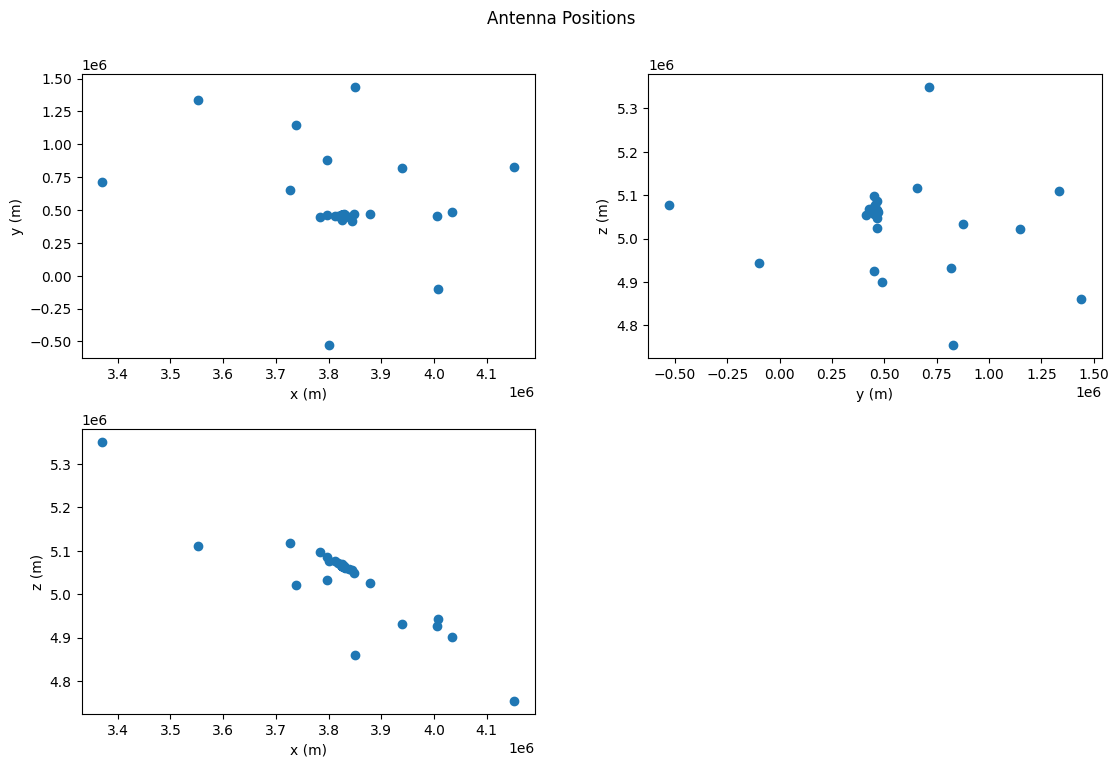

In [9]:
ps_xdt.xr_ps.plot_antenna_positions(label_all_antennas=False)

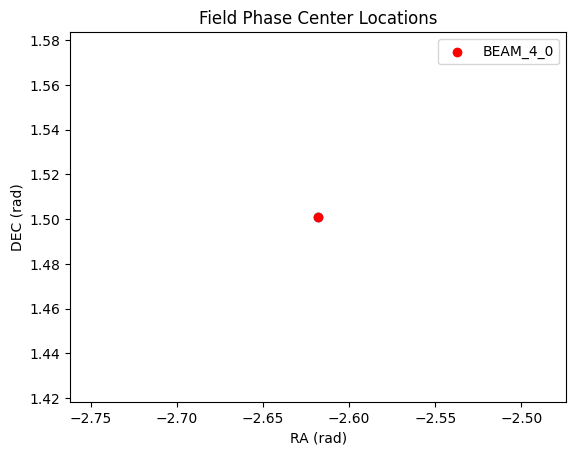

In [10]:
ps_xdt.xr_ps.plot_phase_centers()